In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from biokit.viz import corrplot
import warnings
data = pd.read_csv("/Users/jiezou/Documents/GitHub/DataMining_project/data_lst_cutc.csv") 

In [26]:
data = data.drop(['weekly_price', 'monthly_price','city','state','host_since'],axis = 1)
data = data.drop(['neighbourhood'],axis = 1)
data.shape
data.isnull().sum()

id                                1
name                              0
summary                         217
space                          1134
description                      30
neighborhood_overview          1979
notes                          2906
transit                        2345
access                         2719
interaction                    2526
house_rules                    2030
host_id                           0
host_about                     1855
host_response_time              791
host_response_rate              791
host_is_superhost                 2
host_total_listings_count         2
host_verifications                1
host_has_profile_pic              2
host_identity_verified            2
neighbourhood_cleansed            1
zipcode                         244
latitude                          1
longitude                         1
property_type                     1
room_type                         1
accommodates                      1
bathrooms                   

In [27]:
data.isnull().sum().sort_values(ascending = False)

notes                          2906
access                         2719
interaction                    2526
transit                        2345
house_rules                    2030
neighborhood_overview          1979
host_about                     1855
review_scores_value            1600
review_scores_location         1600
review_scores_checkin          1600
review_scores_cleanliness      1597
review_scores_communication    1596
review_scores_rating           1594
security_deposit               1590
space                          1134
cleaning_fee                    847
host_response_rate              791
host_response_time              791
zipcode                         244
summary                         217
description                      30
bathrooms                        19
beds                             12
bedrooms                          4
cancellation_policy               3
instant_bookable                  2
minimum_nights                    2
host_identity_verified      

In [28]:
data.shape

(7788, 46)

In [29]:
missing_data = data.isnull().sum().sort_values(ascending = False)
missing_data_rate = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
print(missing_data_rate)

notes                          0.373138
access                         0.349127
interaction                    0.324345
transit                        0.301104
house_rules                    0.260657
neighborhood_overview          0.254109
host_about                     0.238187
review_scores_value            0.205444
review_scores_location         0.205444
review_scores_checkin          0.205444
review_scores_cleanliness      0.205059
review_scores_communication    0.204931
review_scores_rating           0.204674
security_deposit               0.204160
space                          0.145609
cleaning_fee                   0.108757
host_response_rate             0.101567
host_response_time             0.101567
zipcode                        0.031330
summary                        0.027863
description                    0.003852
bathrooms                      0.002440
beds                           0.001541
bedrooms                       0.000514
cancellation_policy            0.000385


In [30]:
df = data.dropna(axis=0, subset=['id','host_verifications','room_type','accommodates','property_type','amenities','price','bed_type','host_identity_verified','minimum_nights','maximum_nights','instant_bookable','neighbourhood_cleansed','host_is_superhost','host_total_listings_count','number_of_reviews','host_has_profile_pic','longitude','latitude','cancellation_policy','bedrooms','beds','bathrooms','description','summary'])

In [31]:
print(df.shape)

(7543, 46)


In [32]:
df ['notes']= data['notes'].fillna(value = 'nothing', axis=0)
df ['host_response_rate']= data['host_response_rate'].fillna(value = 0, axis=0)
df ['security_deposit']= data['security_deposit'].fillna(value = 0, axis=0)
df ['space']= data['space'].fillna(value = 'nothing', axis=0)
df ['neighborhood_overview']= data['neighborhood_overview'].fillna(value = 'nothing', axis=0)
df ['transit']= data['transit'].fillna(value = 'nothing', axis=0)
df ['access']= data['access'].fillna(value = 'nothing', axis=0)
df ['interaction']= data['interaction'].fillna(value = 'nothing', axis=0)
df ['house_rules']= data['house_rules'].fillna(value = 'nothing', axis=0)
df ['host_about']= data['host_about'].fillna(value = 'nothing', axis=0)
df ['host_response_time']= data['host_response_time'].fillna(value = 'nothing', axis=0)
df ['cleaning_fee']= data['cleaning_fee'].fillna(value = 'NULL', axis=0)
df ['review_scores_rating']= data['review_scores_rating'].fillna(value = 'nothing', axis=0)
df ['review_scores_cleanliness']= data['review_scores_cleanliness'].fillna(value = 'nothing', axis=0)
df ['review_scores_checkin']= data['review_scores_checkin'].fillna(value = 'nothing', axis=0)
df ['review_scores_communication']= data['review_scores_communication'].fillna(value = 'nothing', axis=0)
df ['review_scores_location']= data['review_scores_location'].fillna(value = 'nothing', axis=0)
df ['review_scores_value']= data['review_scores_value'].fillna(value = 'nothing', axis=0)
df ['zipcode']= data['zipcode'].fillna(value = 'nothing', axis=0)

/Users/jiezou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jiezou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jiezou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [33]:
df.isnull().sum()

id                             0
name                           0
summary                        0
space                          0
description                    0
neighborhood_overview          0
notes                          0
transit                        0
access                         0
interaction                    0
house_rules                    0
host_id                        0
host_about                     0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
zipcode                        0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type  

In [34]:
df.dtypes

id                             float64
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
notes                           object
transit                         object
access                          object
interaction                     object
house_rules                     object
host_id                         object
host_about                      object
host_response_time              object
host_response_rate              object
host_is_superhost               object
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic            object
host_identity_verified          object
neighbourhood_cleansed          object
zipcode                         object
latitude                        object
longitude                       object
property_type                   object
room_type                

In [36]:
df['host_response_time'].value_counts()
convert_host_response_time = {"host_response_time":{"within an hour":1, "within a few hours":2, "within a day": 3, "a few days or more":4, "nothing":0}}
df.replace(convert_host_response_time, inplace = True)
df['host_response_time'].value_counts()

1    4642
2    1336
0     758
3     728
4      79
Name: host_response_time, dtype: int64

In [37]:
df["host_is_superhost"].value_counts()
convert_host_is_superhost = {"host_is_superhost":{"f":0,"t":1}}
df.replace(convert_host_is_superhost, inplace=True)
df["host_is_superhost"].value_counts()

0    4198
1    3345
Name: host_is_superhost, dtype: int64

In [38]:
df["host_has_profile_pic"].value_counts()
convert_host_has_profile_pic = {"host_has_profile_pic": {"t":1, "f": 0}}
df.replace(convert_host_has_profile_pic, inplace=True)
df["host_has_profile_pic"].value_counts()

1    7502
0      41
Name: host_has_profile_pic, dtype: int64

In [39]:
df["host_identity_verified"].value_counts()
convert_host_identity_verified = {"host_identity_verified":{"t":1, "f":0}}
df.replace(convert_host_identity_verified, inplace=True)
df["host_identity_verified"].value_counts()

1    4059
0    3484
Name: host_identity_verified, dtype: int64

In [41]:
df["neighbourhood_cleansed"].value_counts()
convert_neighbourhood_cleansed = {"neighbourhood_cleansed":{"Mission":1, "South of Market":2, "Downtown/Civic Center":3, "Western Addition":4, "Castro/Upper Market":5, "Bernal Heights":6, "Haight Ashbury":7, "Noe Valley":8, "Nob Hill":9, "Outer Sunset":10, "Potrero Hill":11, "Inner Richmond":12, "Marina":13, "Bayview":14, "Russian Hill":15, "North Beach":16, "Inner Sunset":17, "Excelsior":18, "Outer Mission":19, "Financial District":20, "Outer Richmond":21, "Pacific Heights":22, "West of Twin Peaks":23, "Parkside":24, "Chinatown":25, "Ocean View":26, "Visitacion Valley":27, "Twin Peaks":28, "Glen Park":29, "Lakeshore":30, "Crocker Amazon":31, "Presidio Heights":32, "Seacliff":33, "Diamond Heights":34, "Golden Gate Park":35, "Presidio":36}}
df.replace(convert_neighbourhood_cleansed, inplace=True)
df["neighbourhood_cleansed"].value_counts()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [17]:
df["property_type"].value_counts()
#df['price'] = (df['price'].str.replace(r'[^-+\d.]', '').astype(float))
#convert_property_type = ["property_type":{"Apartment":1,"Condominium":1, "Guest suite":1, "House":2, "Townhouse":2, "Boutique hotel":3, "Hotel":3, "Serviced apartment":1, "Loft":2, "Hostel":4, "Guesthouse": 2,"Bed and breakfast":4, "Aparthotel":3, "Other":4, "Bungalow":2, "Resort":3, "Villa":2, "Cottage":2, "Tiny house":2, "Boat":2, "Earth house":2, "Cabin":2, "Timeshare":3}]
#categorical_type_df.replace(convert_property_type, inplace=True)
#categorical_type_df["property_type"].value_counts()

Apartment             3038
House                 2127
Condominium            823
Guest suite            544
Boutique hotel         226
Hotel                  150
Townhouse              140
Serviced apartment     121
Loft                    90
Hostel                  85
Guesthouse              40
Bed and breakfast       35
Aparthotel              30
Other                   28
Bungalow                18
Resort                  17
Villa                    9
Cottage                  8
Tiny house               3
Boat                     2
Earth house              2
Cabin                    2
Castle                   1
Dome house               1
Timeshare                1
In-law                   1
Camper/RV                1
Name: property_type, dtype: int64

In [19]:
df["bed_type"].value_counts()
convert_bed_type = {"bed_type":{"Real Bed":1, "Futon":2, "Pull-out Sofa":3, "Airbed":4, "Couch":5}}
df.replace(convert_bed_type, inplace=True)
df["bed_type"].value_counts()

1    7475
2      31
3      23
4       9
5       5
Name: bed_type, dtype: int64

In [20]:
convert_room_type = {"room_type":{"Entire home/apt":1,"Private room":2, "Shared room":3}}
df.replace(convert_room_type, inplace=True)
df["room_type"].value_counts()

1    4537
2    2783
3     223
Name: room_type, dtype: int64

In [21]:
convert_instant_bookable = {"instant_bookable":{"t":1, "f": 0}}
df.replace(convert_instant_bookable, inplace=True)
df["instant_bookable"].value_counts()

0    4549
1    2994
Name: instant_bookable, dtype: int64

In [22]:
convert_cancellation_policy = {"cancellation_policy":{"strict_14_with_grace_period":1, "moderate":2, "flexible":3, "super_strict_30":4, "super_strict_60":5, "strict":6}}
df.replace(convert_cancellation_policy, inplace=True)
df["cancellation_policy"].value_counts()

1    3313
2    2522
3    1560
6      97
4      32
5      19
Name: cancellation_policy, dtype: int64

In [23]:
df.dtypes

id                             float64
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
notes                           object
transit                         object
access                          object
interaction                     object
house_rules                     object
host_id                         object
host_about                      object
host_response_time              object
host_response_rate              object
host_is_superhost                int64
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic             int64
host_identity_verified           int64
neighbourhood_cleansed           int64
zipcode                         object
latitude                        object
longitude                       object
property_type                   object
room_type                

In [ ]:
df.dtypes

id                             float64
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
notes                           object
transit                         object
access                          object
interaction                     object
house_rules                     object
host_id                         object
host_about                      object
host_response_time              object
host_response_rate              object
host_is_superhost                int64
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic             int64
host_identity_verified           int64
neighbourhood_cleansed           int64
zipcode                         object
latitude                        object
longitude                       object
property_type                   object
room_type                

In [ ]:
df['price'] = (df['price'].str.replace(r'[^-+\d.]', '').astype(float))

/Users/xianghuihuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.dtypes

id                             float64
name                            object
summary                         object
space                           object
description                     object
neighborhood_overview           object
notes                           object
transit                         object
access                          object
interaction                     object
house_rules                     object
host_id                         object
host_about                      object
host_response_time              object
host_response_rate              object
host_is_superhost                int64
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic             int64
host_identity_verified           int64
neighbourhood_cleansed           int64
zipcode                         object
latitude                        object
longitude                       object
property_type                   object
room_type                

In [ ]:
df.isnull().sum()

id                             0
name                           0
summary                        0
space                          0
description                    0
neighborhood_overview          0
notes                          0
transit                        0
access                         0
interaction                    0
house_rules                    0
host_id                        0
host_about                     0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
zipcode                        0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type  

In [ ]:
df.to_csv("/Users/xianghuihuang/Desktop/version3.1.2.csv")

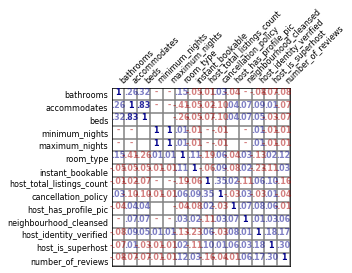

In [ ]:
cpplot = df.loc[:,['host_response_time','host_is_superhost','host_total_listings_count','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','room_type','accommodates','bathrooms','beds','minimum_nights','maximum_nights','number_of_reviews','instant_bookable','cancellation_policy']]
df_corr = cpplot.corr()
c = corrplot.Corrplot(df_corr)
#matplotlib.rcParams['figure.dpi'] = 120
#matplotlib.rcParams['figure.figsize'] = (8,6)
c.plot(method='number', fontsize=8, colorbar=False, shrink=0.9 ,rotation=45)
# only red to blue colormap is implemented so far

In [1]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_cleansed)
plt.ioff()

NameError: name 'plt' is not defined